# **Earthquake data analysis**

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [15]:
plt.style.use('fast')

### **Load Dataset**

In [9]:
data = pd.read_csv('./data/earthquake_data.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

#### **Convert datatime field**

In [11]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      782 non-null    object        
 1   magnitude  782 non-null    float64       
 2   date_time  782 non-null    datetime64[ns]
 3   cdi        782 non-null    int64         
 4   mmi        782 non-null    int64         
 5   alert      415 non-null    object        
 6   tsunami    782 non-null    int64         
 7   sig        782 non-null    int64         
 8   net        782 non-null    object        
 9   nst        782 non-null    int64         
 10  dmin       782 non-null    float64       
 11  gap        782 non-null    float64       
 12  magType    782 non-null    object        
 13  depth      782 non-null    float64       
 14  latitude   782 non-null    float64       
 15  longitude  782 non-null    float64       
 16  location   777 non-null    object        
 1

### **Data description**

In [12]:
data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


#### **Earthquakes by country**

In [70]:
earthquakes_country_count = data.groupby('country', dropna=False)['title'].count().sort_values(ascending=False).reset_index()
earthquakes_country_count = earthquakes_country_count.rename(columns={ 'title': 'count' })
earthquakes_country_count

,country,count
0,NaN,298
1,Indonesia,110
2,Papua New Guinea,56
3,Chile,34
4,Vanuatu,27
5,Solomon Islands,22
6,Japan,21
7,Peru,20
8,Mexico,20
9,United States of America,17


<Axes: title={'center': 'Earthquake count by country'}, xlabel='country'>

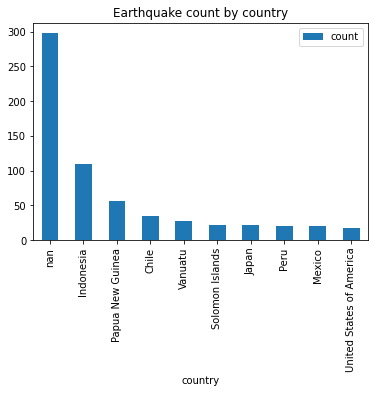

In [74]:
earthquakes_country_count[0:10].plot(x='country', y='count', kind='bar', title='Earthquake count by country')

Text(0, 0.5, 'frequency')

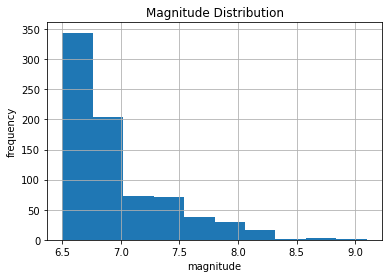

In [80]:
data['magnitude'].hist()
plt.title('Magnitude Distribution')
plt.xlabel('magnitude')
plt.ylabel('frequency')